In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [5]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [6]:
df['target'] = data.target

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
x_multiclass = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y_multiclass = df['target']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x_multiclass,y_multiclass,test_size=0.2,random_state=40)

In [11]:
scaler = StandardScaler()
scaler

StandardScaler()

In [12]:
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [13]:
x_scaled_train

array([[ 0.17933237, -1.9885443 ,  0.15787661, -0.23382732],
       [-0.90875166,  0.51372308, -1.13896696, -0.89249581],
       [-1.02964989,  0.74120193, -1.19535147, -1.02422951],
       [-0.66695521,  1.42363849, -1.25173597, -1.28769691],
       [-1.39234456,  0.28624422, -1.36450498, -1.28769691],
       [ 0.66292527, -0.62367119,  1.06002866,  1.21524337],
       [-1.51324279,  0.74120193, -1.30812047, -1.15596321],
       [-1.75503924,  0.28624422, -1.36450498, -1.28769691],
       [-0.18336231, -1.30610775,  0.72172164,  1.08350967],
       [-0.18336231,  3.01599045, -1.25173597, -1.02422951],
       [-1.51324279,  0.05876537, -1.25173597, -1.28769691],
       [ 1.02561995,  0.05876537,  0.55256813,  0.42484118],
       [ 0.30023059, -0.16871348,  0.66533714,  0.82004227],
       [ 1.50921285, -0.16871348,  1.22918217,  1.21524337],
       [ 1.63011107,  0.28624422,  1.28556667,  0.82004227],
       [-0.90875166,  0.74120193, -1.25173597, -1.28769691],
       [ 2.2346022 , -1.

In [14]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [15]:
dt_model.fit(x_scaled_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
dt_model.predict(x_scaled_test)

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [17]:
confusion_matrix(y_test,dt_model.predict(x_scaled_test))

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  9]])

In [18]:
accuracy_score(y_test,dt_model.predict(x_scaled_test))

0.9666666666666667

In [20]:
print(classification_report(y_test,dt_model.predict(x_scaled_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [21]:
from sklearn.tree import plot_tree

[Text(0.375, 0.875, 'x[2] <= -0.716\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 0.754\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(0.25, 0.375, 'x[2] <= 0.694\ngini = 0.21\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(0.125, 0.125, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 0.637\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

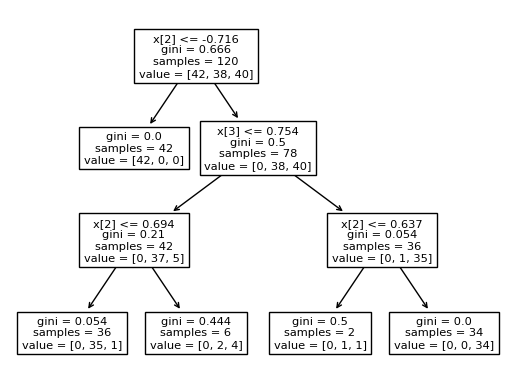

In [25]:
plot_tree(dt_model)

[Text(0.375, 0.875, 'petal length (cm) <= -0.716\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 0.754\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]\nclass = virginica'),
 Text(0.25, 0.375, 'petal length (cm) <= 0.694\ngini = 0.21\nsamples = 42\nvalue = [0, 37, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 0.637\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = virginica')]

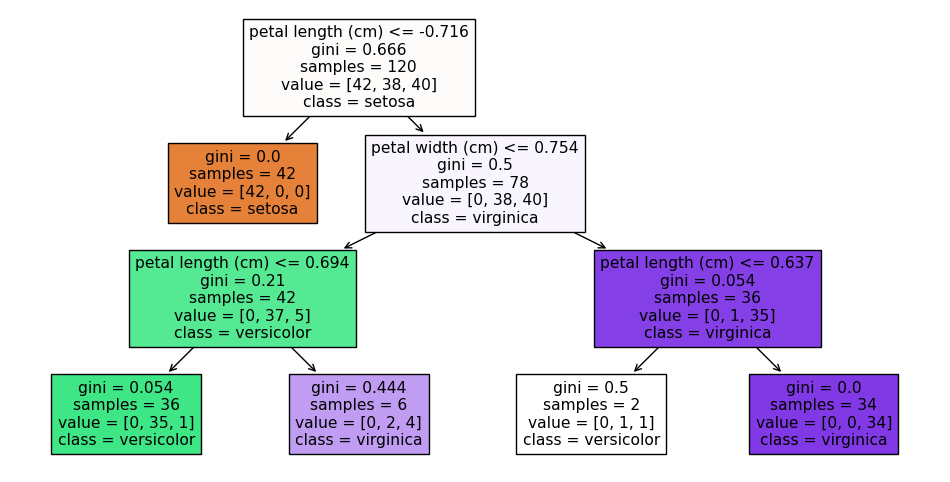

In [27]:
plt.figure(figsize=(12,6))
plot_tree(dt_model,feature_names=data.feature_names,class_names=data.target_names,filled=True)


In [29]:
dt_model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_model_entropy.fit(x_scaled_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
dt_model_entropy.predict(x_scaled_test)

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [31]:
confusion_matrix(y_test,dt_model_entropy.predict(x_scaled_test))

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  9]])

In [33]:
print(classification_report(y_test,dt_model_entropy.predict(x_scaled_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [34]:
accuracy_score(y_test,dt_model_entropy.predict(x_scaled_test))

0.9666666666666667

[Text(0.375, 0.875, 'petal length (cm) <= -0.716\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 0.754\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]\nclass = virginica'),
 Text(0.25, 0.375, 'petal length (cm) <= 0.694\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 0.637\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]\nclass = virginica'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = virginica')]

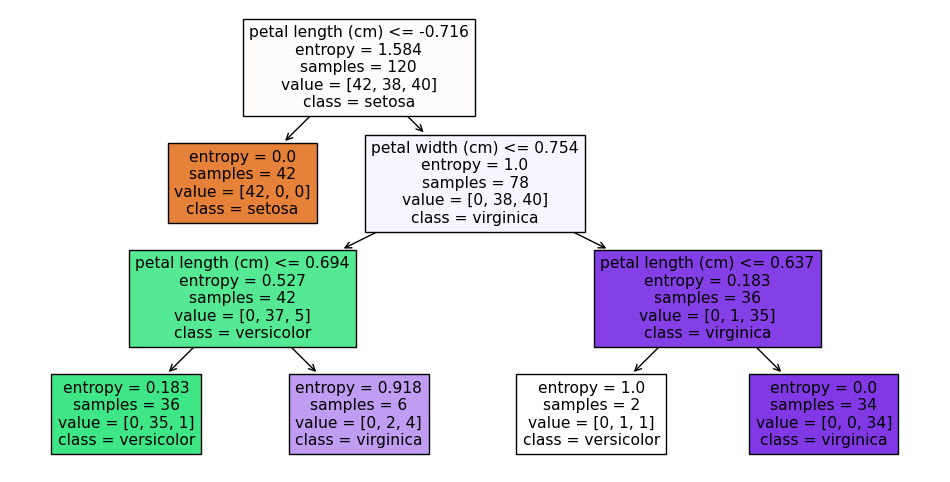

In [35]:
plt.figure(figsize=(12,6))
plot_tree(dt_model_entropy,feature_names=data.feature_names,class_names=data.target_names,filled=True)


[[ 8  0  0]
 [ 0 12  0]
 [ 0  1  9]]
0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



[Text(0.375, 0.875, 'petal width (cm) <= -0.497\nlog_loss = 1.584\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(0.25, 0.625, 'log_loss = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 0.754\nlog_loss = 1.0\nsamples = 78\nvalue = [0, 38, 40]\nclass = virginica'),
 Text(0.25, 0.375, 'petal length (cm) <= 0.694\nlog_loss = 0.527\nsamples = 42\nvalue = [0, 37, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'log_loss = 0.183\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'log_loss = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 0.637\nlog_loss = 0.183\nsamples = 36\nvalue = [0, 1, 35]\nclass = virginica'),
 Text(0.625, 0.125, 'log_loss = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.875, 0.125, 'log_loss = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = virginica')]

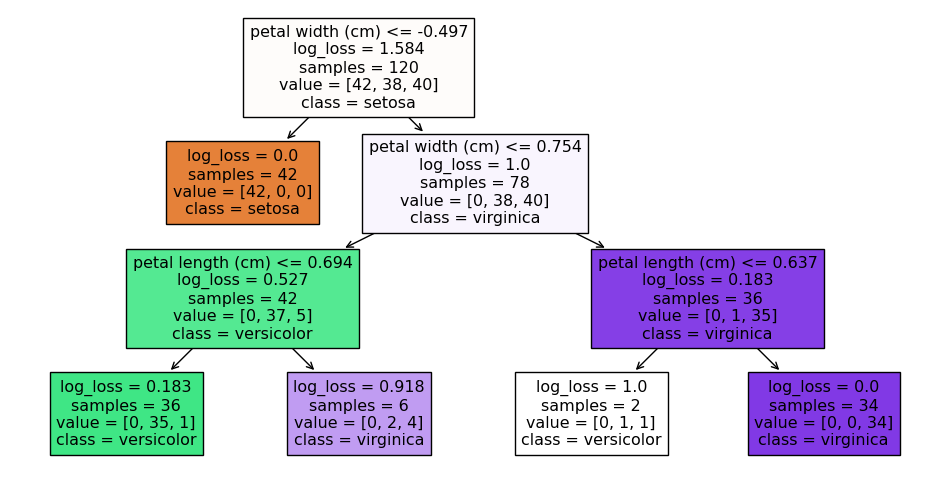

In [36]:
dt_model_logloss = DecisionTreeClassifier(criterion='log_loss',max_depth=3)
dt_model_logloss.fit(x_scaled_train,y_train)
dt_model_logloss.predict(x_scaled_test)
print(confusion_matrix(y_test,dt_model_logloss.predict(x_scaled_test)))
print(accuracy_score(y_test,dt_model_logloss.predict(x_scaled_test)))
print(classification_report(y_test,dt_model_logloss.predict(x_scaled_test)))
plt.figure(figsize=(12,6))
plot_tree(dt_model_logloss,feature_names=data.feature_names,class_names=data.target_names,filled=True)


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_model = RandomForestClassifier(n_estimators=10,criterion='gini')
rf_model.fit(x_scaled_train,y_train)
rf_model.predict(x_scaled_test)
print(confusion_matrix(y_test,rf_model.predict(x_scaled_test)))
print(accuracy_score(y_test,rf_model.predict(x_scaled_test)))
print(classification_report(y_test,rf_model.predict(x_scaled_test)))

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



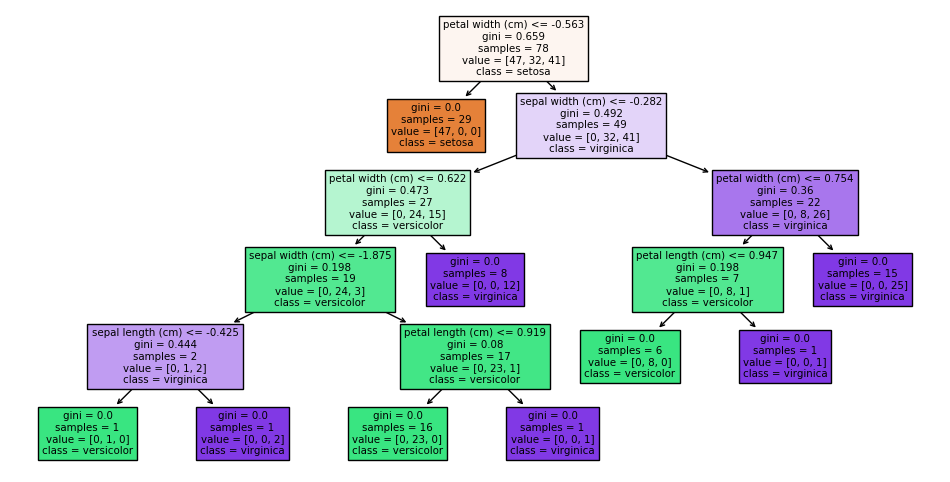

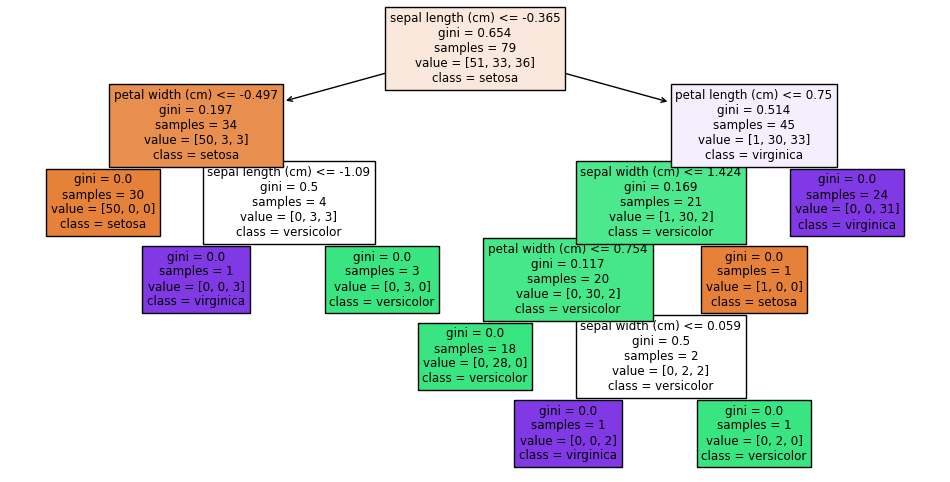

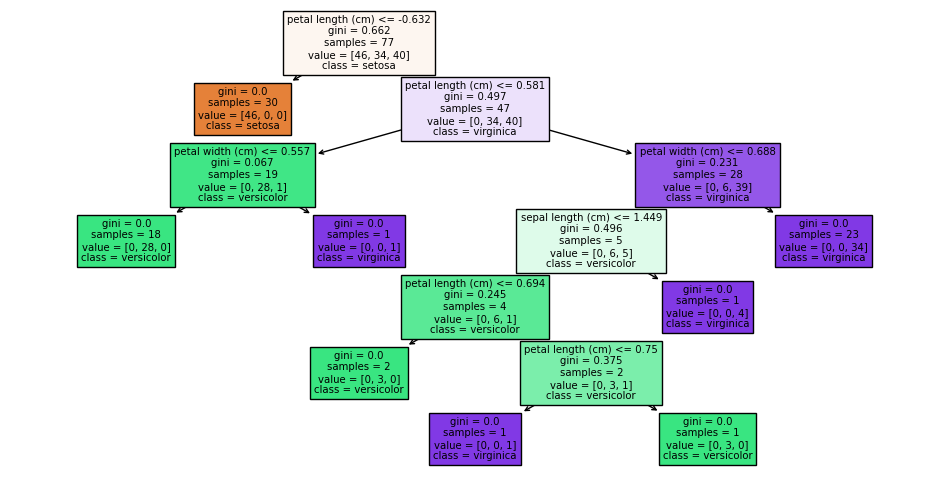

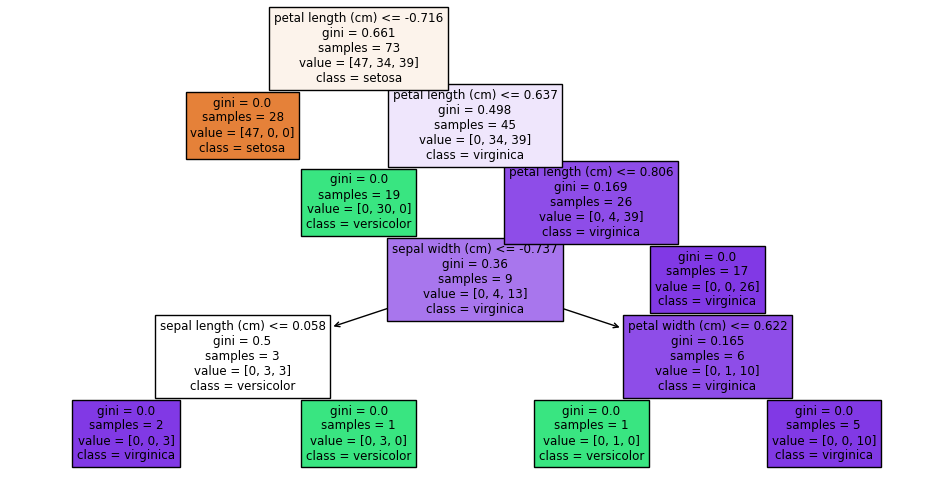

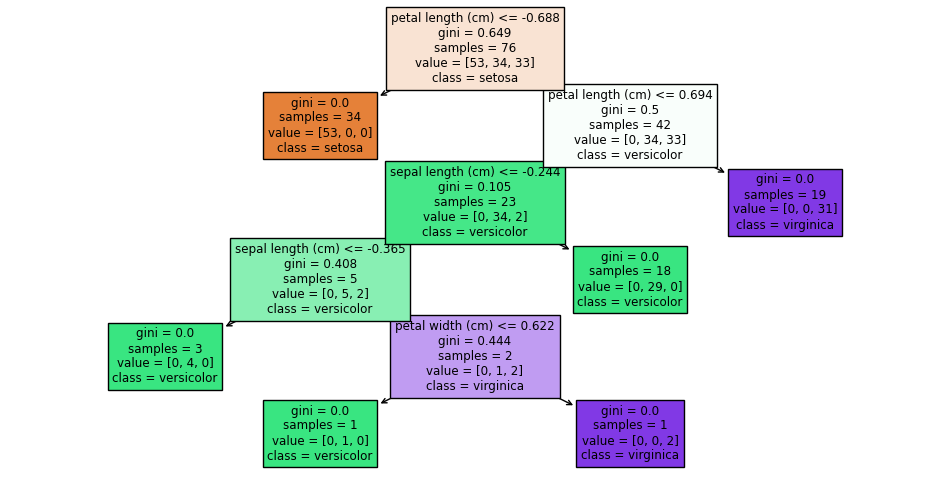

In [46]:
for i in range(min(5,len(rf_model.estimators_))) : 
    plt.figure(figsize=(12,6))
    plot_tree(rf_model.estimators_[i],feature_names=data.feature_names , class_names= data.target_names,filled=True)
    plt.show()

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import fetch_california_housing

In [54]:
data = fetch_california_housing()
df = pd.DataFrame(data.data,columns=data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [55]:
df['target'] = data.target

In [56]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [58]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [59]:
x = df.drop(columns=['target'])
y = df['target']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
sclaer = StandardScaler()
x_train_scaled = sclaer.fit_transform(x_train)
x_test_scaled = sclaer.transform(x_test)

In [62]:
rf_regressor = RandomForestRegressor(n_estimators=10,criterion='squared_error',random_state=42)
rf_regressor.fit(x_train_scaled,y_train)
y_pred = rf_regressor.predict(x_test_scaled)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared Score:', r2_score(y_test, y_pred))


Mean Squared Error: 0.28364877522100695
R-squared Score: 0.7835417950190033


In [63]:
rf_regressor2 = RandomForestRegressor(n_estimators=50,criterion='squared_error',random_state=42)
rf_regressor2.fit(x_train_scaled,y_train)
y_pred = rf_regressor2.predict(x_test_scaled)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.2570031753122074
R-squared Score: 0.8038755994657409


In [65]:
rf_regressor3 = RandomForestRegressor(n_estimators=500,criterion='squared_error',random_state=42)
rf_regressor3.fit(x_train_scaled,y_train)
y_pred = rf_regressor3.predict(x_test_scaled)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.25203520234799337
R-squared Score: 0.8076667616499951


In [66]:
#joblib.dump(rf_regressor3,'randomforest_reg.pkl')

['randomforest_reg.pkl']

In [ ]:
for i in range(min(5,len(rf_regressor.estimators_))) : 
    plt.figure(figsize=(12,6))
    plot_tree(rf_regressor.estimators_[i],feature_names=data.feature_names , class_names= data.target_names,filled=True)
    plt.show()

In [68]:
x = df.head(20).drop(columns= ['target'] )
y = df['target'][:20]

In [69]:
x_train , x_test , y_train , y_test = train_test_split(x,y , random_state=10 , test_size=.1)

In [70]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [71]:
rf_model_reg = RandomForestRegressor(n_estimators=1000 , criterion='squared_error' , random_state= 30 )
rf_model_reg.fit(x_train,y_train)
y_pred = rf_model_reg.predict(x_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.2517224679450023
R-squared Score: -5.261713992947869


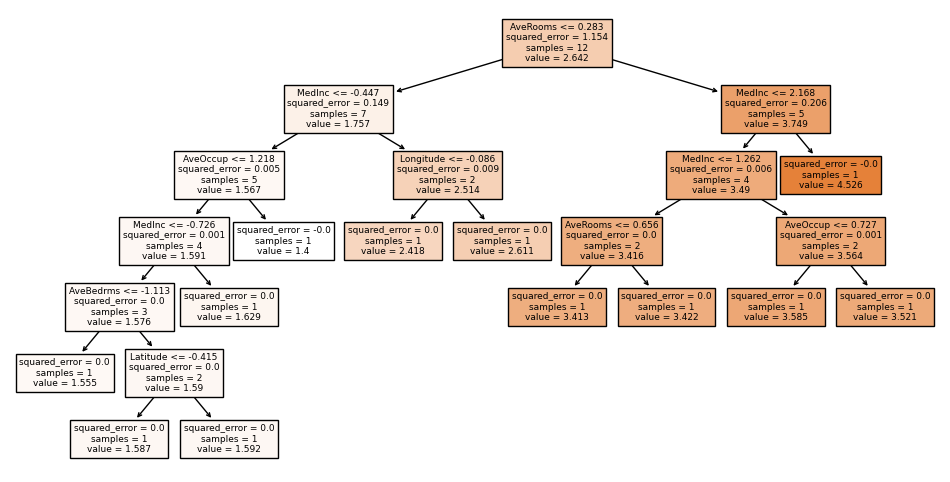

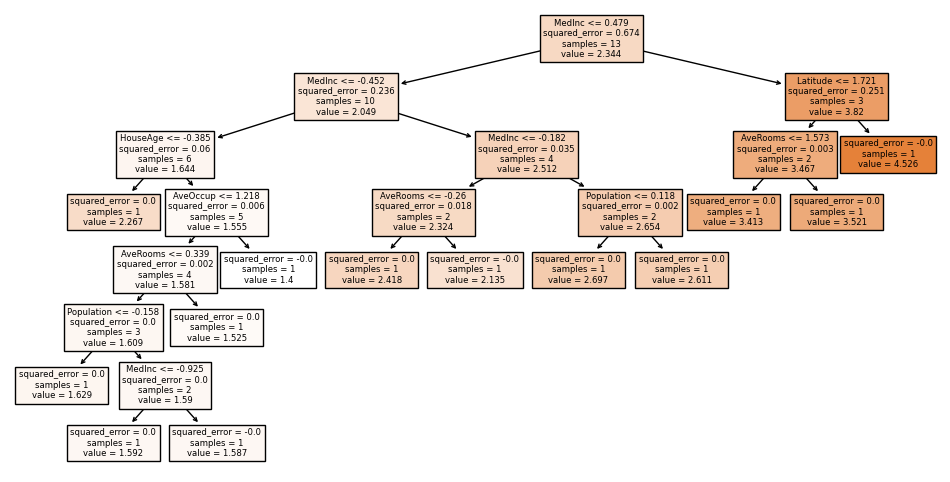

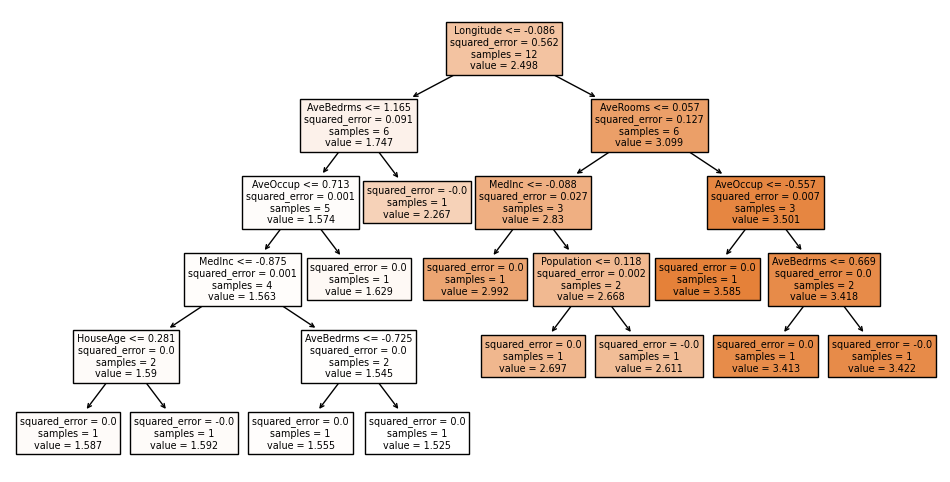

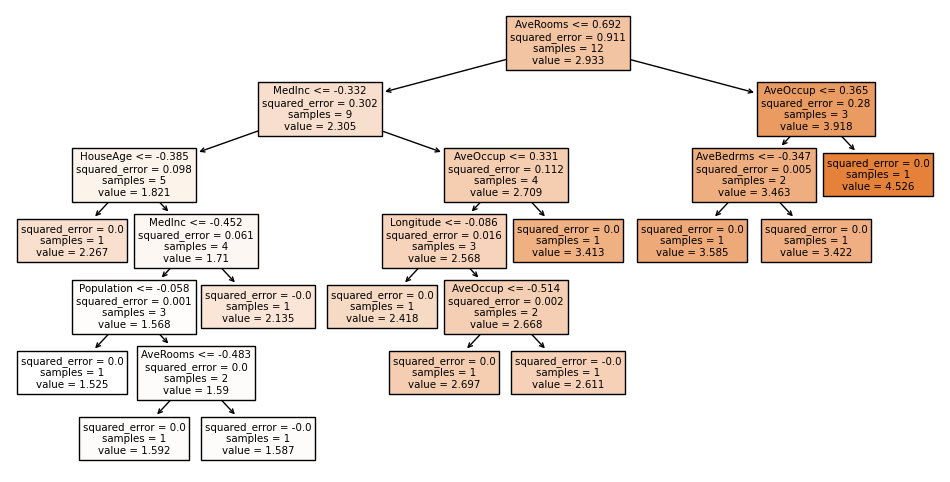

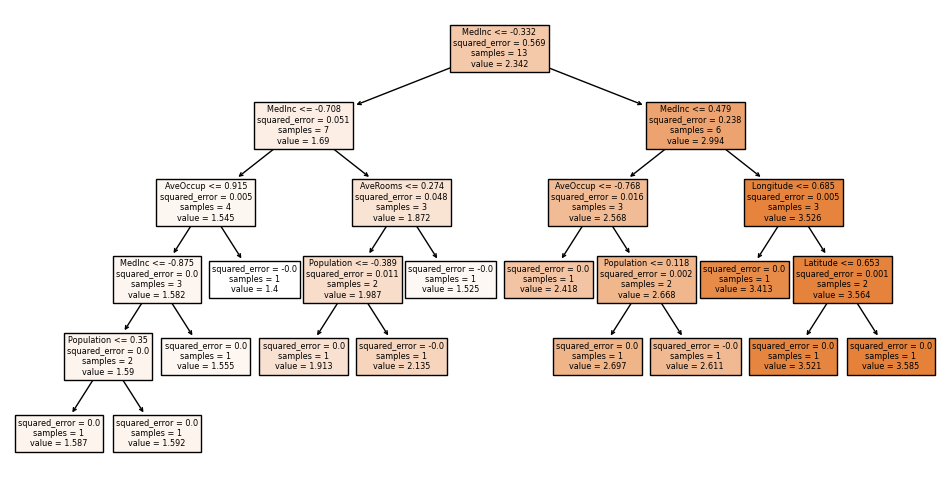

In [72]:
for i in range(min(5,len(rf_model_reg.estimators_))) : 
    plt.figure(figsize=(12,6))
    plot_tree(rf_model_reg.estimators_[i],feature_names=data.feature_names , class_names= data.target_names,filled=True)
    plt.show()